In [314]:
# =========================
# 1. LIBRERÍAS
# =========================
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import gower
import matplotlib.pyplot as plt
import seaborn as sns
# =========================
# 2. CARGA Y PREPROCESAMIENTO
# =========================
datos = pd.read_excel("Data/Datos.xlsx", sheet_name="Datos")
resultados = []

**FUNCIONES**

**IMPUTACION DE DATOS FALTANTES Y ESTANDARIZACION DE LOS DATOS**

In [317]:
def transformacion(df):
    for c in df.columns:
        if df[c].dtype in ["float64", "int64"]:
            df[c] = df[c].fillna(df[c].median())
        else:
            df[c] = df[c].fillna(df[c].mode()[0])

    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df



**VISUALIZACION DENDROGRAMA**

In [319]:
def visualiza_dendrograma(df):
    plt.figure(figsize=(12,6))
    dendrogram(df, truncate_mode="level", p=5)
    plt.title("Dendrograma con distancia de Gower")
    plt.xlabel("Observaciones")
    plt.ylabel("Distancia")
    plt.show()

**EXPERIMENTO 1**

C:\Users\HP DY 1071\AppData\Local\Temp\ipykernel_12664\3319461655.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distribucion_gower, method="average")


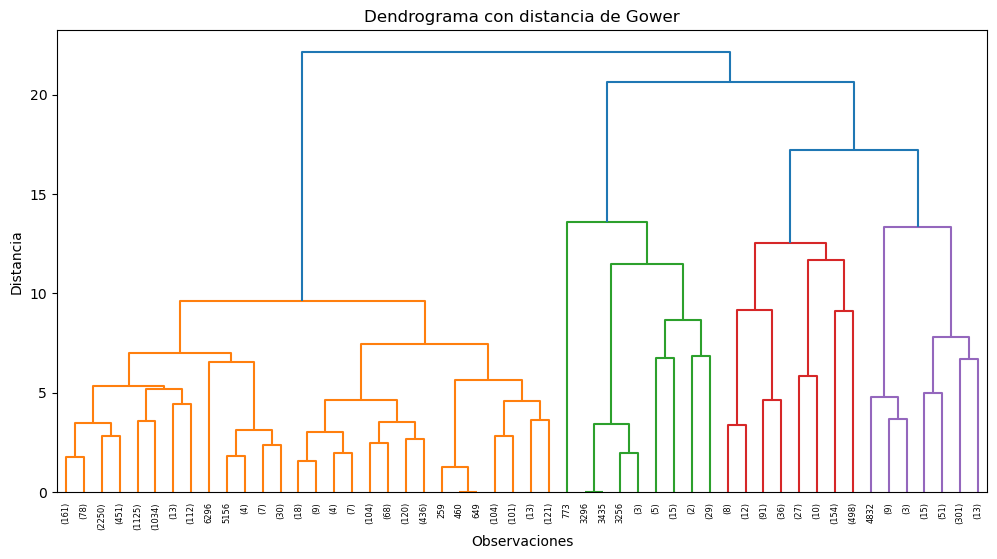

Resultados Indice de Silhouette del Experimento 1
{'k': 2, 'Silhouette': 0.611484}
{'k': 3, 'Silhouette': 0.5973022}
{'k': 4, 'Silhouette': 0.66016084}
{'k': 5, 'Silhouette': 0.6585736}
{'k': 6, 'Silhouette': 0.6436383}
{'k': 7, 'Silhouette': 0.62042093}
{'k': 8, 'Silhouette': 0.5899183}
{'k': 9, 'Silhouette': 0.58820385}
{'k': 10, 'Silhouette': 0.5185288}
{'k': 11, 'Silhouette': 0.5127493}
{'k': 12, 'Silhouette': 0.5168145}
El Mejor número de clústeres es: 4
                TASA_INTERNET_ICFES  dens_int  PERSONAS  AREA  \
Numero_Cluster                                                  
1                              0.76      0.76      3.52  1.00   
2                              0.53      0.53      3.64  1.98   
3                              0.52      0.52      3.60  1.96   
4                              0.73      0.73      3.36  1.00   

                Servicios_Telecomunicaciones_Si  
Numero_Cluster                                   
1                                           1

In [324]:
# Selección de variables relevantes
variables_relevantes = ["TASA_INTERNET_ICFES","dens_int","PERSONAS","AREA","Servicios_Telecomunicaciones_Si"]

X = datos[variables_relevantes].copy()

# Trasnformacion de datos
X_trans=transformacion(X)

# Calculamos la matriz de distancias gower
distribucion_gower = gower.gower_matrix(X_trans)

# Aplicacion del Clustering Jerarquico 
Z = linkage(distribucion_gower, method="average") 

# Visualizacion del Dendrograma
visualiza_dendrograma(Z)

silhouette_scores = {}
print("Resultados Indice de Silhouette del Experimento 1")
for k in range(2, 13):
    labels = fcluster(Z, k, criterion="maxclust")
    silhouette = silhouette_score(distribucion_gower, labels, metric="precomputed")
    silhouette_scores[k] = silhouette
    resultados.append({"Experimento": 1,"k": k,"Silhouette": silhouette})
    print({"k": k,"Silhouette": silhouette})

# Mejor número de clústeres
mejor_num_cluster = max(silhouette_scores, key=silhouette_scores.get)
print("El Mejor número de clústeres es:", mejor_num_cluster)

# Asignamos el resultados de clustes al dataframe
datos_exp1=datos.copy()
labels_final = fcluster(Z, mejor_num_cluster, criterion="maxclust")
datos_exp1["Numero_Cluster"] = labels_final

# =========================
perfil_clusters = datos_exp1.groupby("Numero_Cluster")[variables_relevantes].mean().round(2)
print(perfil_clusters)

# Visualizamos el Tamaño de los clústeres
print("Tamaño de los clústeres:")
print(datos_exp1["Numero_Cluster"].value_counts())

**EXPERIMENTO 2**

C:\Users\HP DY 1071\AppData\Local\Temp\ipykernel_12664\1979292816.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distribucion_gower, method="average")


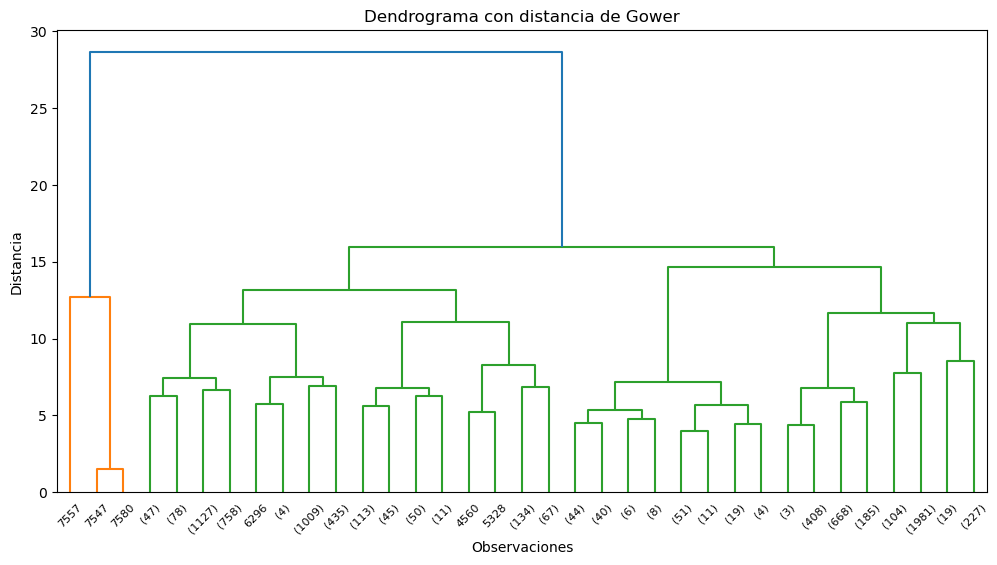

Resultados Indice de Silhouette del Experimento 2
{'k': 2, 'Silhouette': 0.48421186}
{'k': 3, 'Silhouette': 0.4279492}
{'k': 4, 'Silhouette': 0.3746814}
{'k': 5, 'Silhouette': 0.36848438}
{'k': 6, 'Silhouette': 0.36365455}
{'k': 7, 'Silhouette': 0.38369668}
{'k': 8, 'Silhouette': 0.34552267}
{'k': 9, 'Silhouette': 0.35424066}
{'k': 10, 'Silhouette': 0.42068732}
{'k': 11, 'Silhouette': 0.38339975}
{'k': 12, 'Silhouette': 0.3830161}
El Mejor número de clústeres es: 2
                PERSONAS   EDAD  REDAD  GENERO  ESTRATO  SERVICIOS_HOGAR  \
Numero_Cluster                                                             
1                   3.00  69.33   7.00    1.67     6.00          3280.00   
2                   3.52  40.03   3.98    1.51     2.27            61.28   

                HOGARES_INTERNET  
Numero_Cluster                    
1                       72374.00  
2                       14813.31  
Tamaño de los clústeres:
Numero_Cluster
2    7659
1       3
Name: count, dtype: int64

In [325]:
# Selección de variables relevantes
variables_relevantes = ['PERSONAS', 'EDAD', 'REDAD', 'GENERO', 'ESTRATO', 'SERVICIOS_HOGAR', 'HOGARES_INTERNET']

X = datos[variables_relevantes].copy()

# Trasnformacion de datos
X_trans=transformacion(X)

# Calculamos la matriz de distancias gower
distribucion_gower = gower.gower_matrix(X_trans)

# Aplicacion del Clustering Jerarquico 
Z = linkage(distribucion_gower, method="average") 

# Visualizacion del Dendrograma
visualiza_dendrograma(Z)

silhouette_scores = {}
print("Resultados Indice de Silhouette del Experimento 2")
for k in range(2, 13):
    labels = fcluster(Z, k, criterion="maxclust")
    silhouette = silhouette_score(distribucion_gower, labels, metric="precomputed")
    silhouette_scores[k] = silhouette
    resultados.append({"Experimento": 2,"k": k,"Silhouette": silhouette})
    print({"k": k,"Silhouette": silhouette})


# Mejor número de clústeres
mejor_num_cluster = max(silhouette_scores, key=silhouette_scores.get)
print("El Mejor número de clústeres es:", mejor_num_cluster)

# Asignamos el resultados de clustes al dataframe
datos_exp2=datos.copy()
labels_final = fcluster(Z, mejor_num_cluster, criterion="maxclust")
datos_exp2["Numero_Cluster"] = labels_final

# =========================
perfil_clusters = datos_exp2.groupby("Numero_Cluster")[variables_relevantes].mean().round(2)
print(perfil_clusters)

# Visualizamos el Tamaño de los clústeres
print("Tamaño de los clústeres:")
print(datos_exp2["Numero_Cluster"].value_counts())

**EXPERIMENTO 3**

C:\Users\HP DY 1071\AppData\Local\Temp\ipykernel_12664\4026777253.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distribucion_gower, method="average")


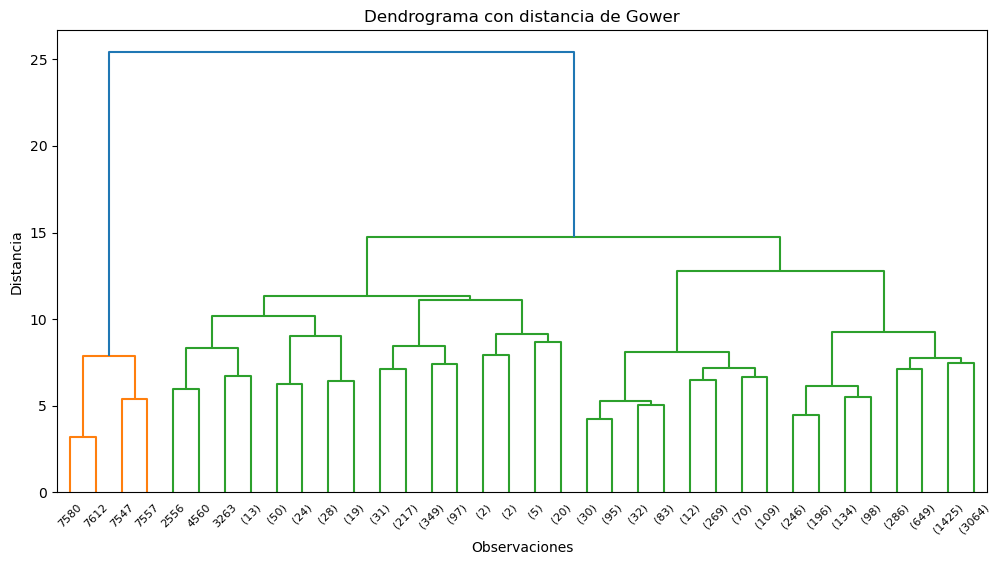

Resultados Indice de Silhouette del Experimento 3
{'k': 2, 'Silhouette': 0.5452144}
{'k': 3, 'Silhouette': 0.43573326}
{'k': 4, 'Silhouette': 0.37803963}
{'k': 5, 'Silhouette': 0.36451003}
{'k': 6, 'Silhouette': 0.3532197}
{'k': 7, 'Silhouette': 0.34972212}
{'k': 8, 'Silhouette': 0.27598205}
{'k': 9, 'Silhouette': 0.27322072}
{'k': 10, 'Silhouette': 0.26268303}
{'k': 11, 'Silhouette': 0.25089583}
{'k': 12, 'Silhouette': 0.24805705}
El Mejor número de clústeres es: 2
                PERSONAS  ESTRATO  SERVICIOS_HOGAR  HOGARES_INTERNET  \
Numero_Cluster                                                         
1                   3.00     5.50          3540.25           72374.0   
2                   3.52     2.27            60.65           14805.8   

                FRECUENCIA_INTERNET  NIVEL_USUARIO_USO_INTERNET  
Numero_Cluster                                                   
1                              1.25                        1.75  
2                              1.81       

In [326]:
# Selección de variables relevantes
variables_relevantes = ['PERSONAS', 'ESTRATO', 'SERVICIOS_HOGAR', 'HOGARES_INTERNET','FRECUENCIA_INTERNET', 'NIVEL_USUARIO_USO_INTERNET']

X = datos[variables_relevantes].copy()

# Trasnformacion de datos
X_trans=transformacion(X)

# Calculamos la matriz de distancias gower
distribucion_gower = gower.gower_matrix(X_trans)

# Aplicacion del Clustering Jerarquico 
Z = linkage(distribucion_gower, method="average") 

# Visualizacion del Dendrograma
visualiza_dendrograma(Z)

silhouette_scores = {}
print("Resultados Indice de Silhouette del Experimento 3")
for k in range(2, 13):
    labels = fcluster(Z, k, criterion="maxclust")
    silhouette = silhouette_score(distribucion_gower, labels, metric="precomputed")
    silhouette_scores[k] = silhouette
    resultados.append({"Experimento": 3,"k": k,"Silhouette": silhouette})
    print({"k": k,"Silhouette": silhouette})
    
# Mejor número de clústeres
mejor_num_cluster = max(silhouette_scores, key=silhouette_scores.get)
print("El Mejor número de clústeres es:", mejor_num_cluster)

# Asignamos el resultados de clustes al dataframe
datos_exp3=datos.copy()
labels_final = fcluster(Z, mejor_num_cluster, criterion="maxclust")
datos_exp3["Numero_Cluster"] = labels_final

# =========================
perfil_clusters = datos_exp3.groupby("Numero_Cluster")[variables_relevantes].mean().round(2)
print(perfil_clusters)

# Visualizamos el Tamaño de los clústeres
print("Tamaño de los clústeres:")
print(datos_exp3["Numero_Cluster"].value_counts())

**EXPERIMENTO 4**

C:\Users\HP DY 1071\AppData\Local\Temp\ipykernel_12664\2577690298.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distribucion_gower, method="average")


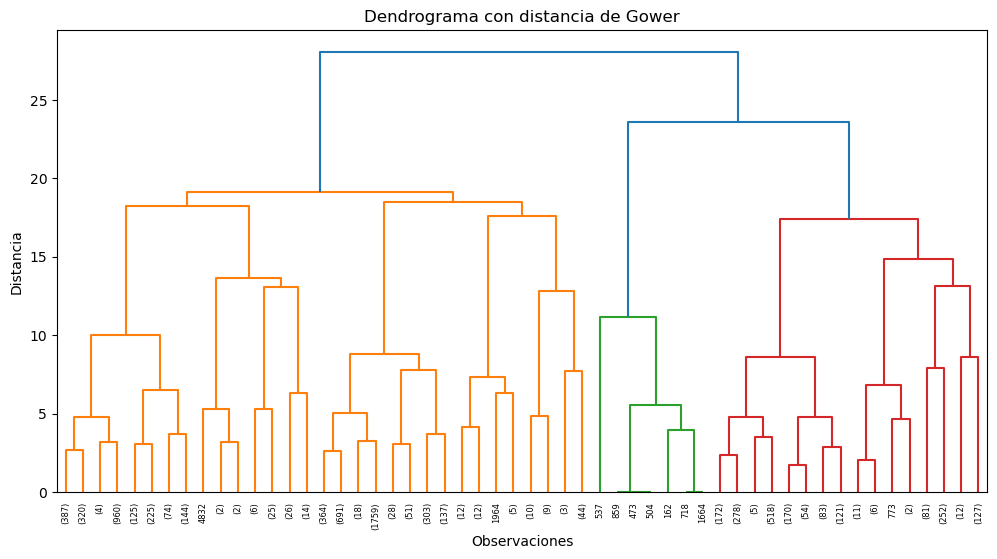

Resultados Indice de Silhouette del Experimento 4
{'k': 2, 'Silhouette': 0.59114015}
{'k': 3, 'Silhouette': 0.556247}
{'k': 4, 'Silhouette': 0.66577256}
{'k': 5, 'Silhouette': 0.6628724}
{'k': 6, 'Silhouette': 0.6534084}
{'k': 7, 'Silhouette': 0.6511178}
{'k': 8, 'Silhouette': 0.67267716}
{'k': 9, 'Silhouette': 0.6605984}
{'k': 10, 'Silhouette': 0.6575796}
{'k': 11, 'Silhouette': 0.6708877}
{'k': 12, 'Silhouette': 0.64829934}
El Mejor número de clústeres es: 8
                TASA_INTERNET_ICFES  dens_int  \
Numero_Cluster                                  
1                              0.73      0.73   
2                              0.49      0.49   
3                              0.77      0.77   
4                              0.76      0.76   
5                              0.55      0.55   
6                              0.59      0.59   
7                              0.72      0.72   
8                              0.58      0.58   

                Servicios_Telecomunicaciones

In [327]:
# Selección de variables relevantes
variables_relevantes = ['TASA_INTERNET_ICFES', 'dens_int', 'Servicios_Telecomunicaciones_Si', 'conexion_hogar_si','interrupciones_si']

X = datos[variables_relevantes].copy()

# Trasnformacion de datos
X_trans=transformacion(X)

# Calculamos la matriz de distancias gower
distribucion_gower = gower.gower_matrix(X_trans)

# Aplicacion del Clustering Jerarquico 
Z = linkage(distribucion_gower, method="average") 

# Visualizacion del Dendrograma
visualiza_dendrograma(Z)

silhouette_scores = {}
print("Resultados Indice de Silhouette del Experimento 4")
for k in range(2, 13):
    labels = fcluster(Z, k, criterion="maxclust")
    silhouette = silhouette_score(distribucion_gower, labels, metric="precomputed")
    silhouette_scores[k] = silhouette
    resultados.append({"Experimento": 4,"k": k,"Silhouette": silhouette})
    print({"k": k,"Silhouette": silhouette})

# Mejor número de clústeres
mejor_num_cluster = max(silhouette_scores, key=silhouette_scores.get)
print("El Mejor número de clústeres es:", mejor_num_cluster)

# Asignamos el resultados de clustes al dataframe
datos_exp4=datos.copy()
labels_final = fcluster(Z, mejor_num_cluster, criterion="maxclust")
datos_exp4["Numero_Cluster"] = labels_final

# =========================
perfil_clusters = datos_exp4.groupby("Numero_Cluster")[variables_relevantes].mean().round(2)
print(perfil_clusters)

# Visualizamos el Tamaño de los clústeres
print("Tamaño de los clústeres:")
print(datos_exp4["Numero_Cluster"].value_counts())

**EXPERIMENTO 5**

C:\Users\HP DY 1071\AppData\Local\Temp\ipykernel_12664\3802036205.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distribucion_gower, method="average")


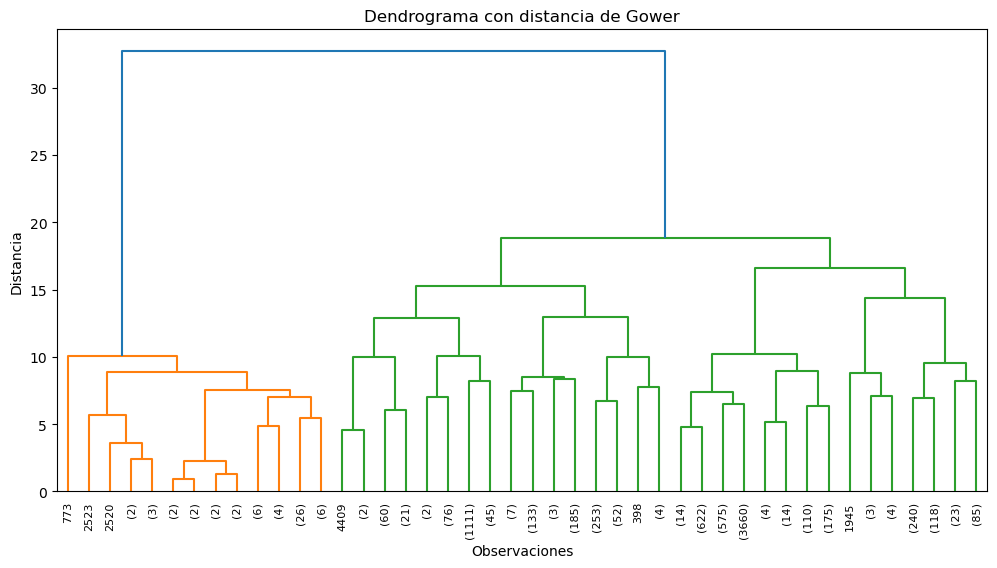

Resultados Indice de Silhouette del Experimento 5
{'k': 2, 'Silhouette': 0.5341717}
{'k': 3, 'Silhouette': 0.50464493}
{'k': 4, 'Silhouette': 0.5087358}
{'k': 5, 'Silhouette': 0.4993982}
{'k': 6, 'Silhouette': 0.49644795}
{'k': 7, 'Silhouette': 0.5421431}
{'k': 8, 'Silhouette': 0.55964625}
{'k': 9, 'Silhouette': 0.47438893}
{'k': 10, 'Silhouette': 0.46344563}
{'k': 11, 'Silhouette': 0.46270046}
{'k': 12, 'Silhouette': 0.462511}
El Mejor número de clústeres es: 8
                TASA_INTERNET_ICFES  dens_int  PERSONAS  AREA  \
Numero_Cluster                                                  
1                              0.46      0.46      3.72  1.98   
2                              0.74      0.74      4.18  1.00   
3                              0.72      0.72      3.15  1.00   
4                              0.51      0.51      3.30  1.99   
5                              0.73      0.73      3.14  1.00   
6                              0.77      0.77      3.61  1.00   
7            

In [328]:
# Selección de variables relevantes
variables_relevantes = ["TASA_INTERNET_ICFES","dens_int","PERSONAS","AREA","Servicios_Telecomunicaciones_Si", 'conexion_hogar_si','NIVEL_USUARIO_USO_INTERNET']

X = datos[variables_relevantes].copy()

# Trasnformacion de datos
X_trans=transformacion(X)

# Calculamos la matriz de distancias gower
distribucion_gower = gower.gower_matrix(X_trans)

# Aplicacion del Clustering Jerarquico 
Z = linkage(distribucion_gower, method="average") 

# Visualizacion del Dendrograma
visualiza_dendrograma(Z)

silhouette_scores = {}
print("Resultados Indice de Silhouette del Experimento 5")
for k in range(2, 13):
    labels = fcluster(Z, k, criterion="maxclust")
    silhouette = silhouette_score(distribucion_gower, labels, metric="precomputed")
    silhouette_scores[k] = silhouette
    resultados.append({"Experimento": 5,"k": k,"Silhouette": silhouette})
    print({"k": k,"Silhouette": silhouette})

# Mejor número de clústeres
mejor_num_cluster = max(silhouette_scores, key=silhouette_scores.get)
print("El Mejor número de clústeres es:", mejor_num_cluster)

# Asignamos el resultados de clustes al dataframe
datos_exp5=datos.copy()
labels_final = fcluster(Z, mejor_num_cluster, criterion="maxclust")
datos_exp5["Numero_Cluster"] = labels_final

# =========================
perfil_clusters = datos_exp5.groupby("Numero_Cluster")[variables_relevantes].mean().round(2)
print(perfil_clusters)

# Visualizamos el Tamaño de los clústeres
print("Tamaño de los clústeres:")
print(datos_exp5["Numero_Cluster"].value_counts())

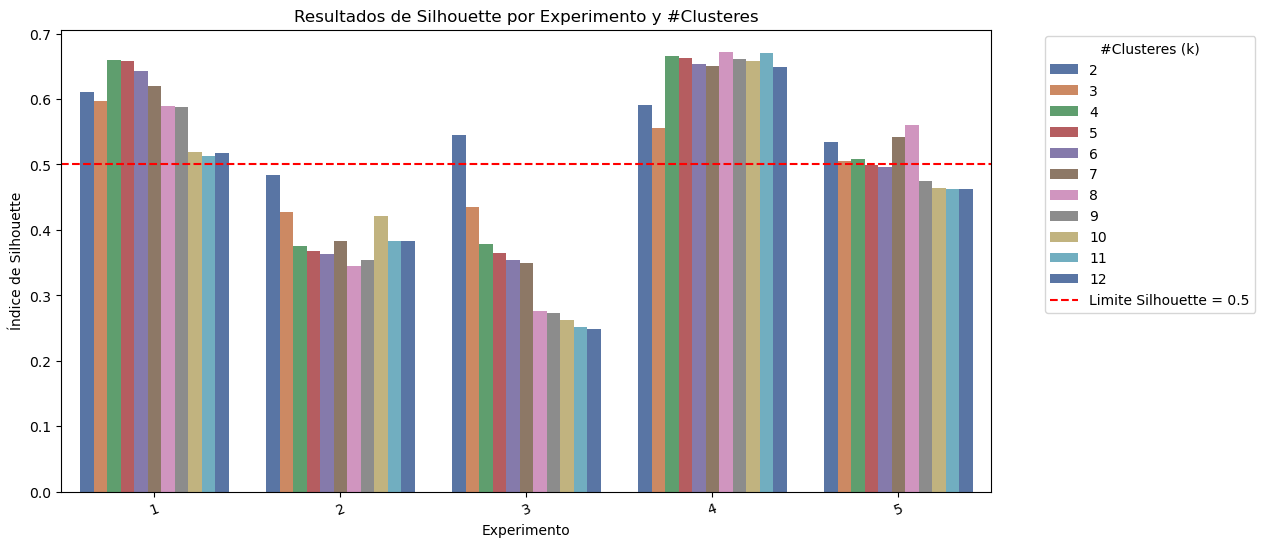

In [334]:
import seaborn as sns

resultados = pd.DataFrame(resultados)

plt.figure(figsize=(12,6))
sns.barplot(data=resultados, x="Experimento", y="Silhouette", hue="k", palette="deep")

plt.axhline(0.5, color="red", linestyle="--", label="Limite Silhouette = 0.5")
plt.title("Resultados de Silhouette por Experimento y #Clusteres")
plt.ylabel("Índice de Silhouette")
plt.xticks(rotation=20)
plt.legend(title="#Clusteres (k)",bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Los experimentos 1 y 4 teniendo en cuenta que los resultados de los indices de Silhouette estan por encima del limite definido de 0.5 son los que generan segmentaciones mas solidas. Los experimentos 2 y 3 no son tan confiables porque sus resultados estan por debajo del limite de 0.5 y el experimento 5 son pocos los valores de k que se acercan al limite dle inidice de Silhouette. 

In [336]:
mejor_resultado = resultados.loc[resultados.groupby("Experimento")["Silhouette"].idxmax()]
mejor_resultado = mejor_resultado[["Experimento", "k", "Silhouette"]]
mejor_resultado = mejor_resultado.sort_values(by="Silhouette", ascending=False)
print(mejor_resultado)

    Experimento  k  Silhouette
39            4  8    0.672677
2             1  4    0.660161
50            5  8    0.559646
22            3  2    0.545214
11            2  2    0.484212


**RESULTADOS Y HALLAZGOS**
- Los mejores resultados obtenidos del indice de Silhouette se evidenciaron en el Experimento 4, seguido por el Experimento 1
- El mejor indice de Silhouette es de 0.672677 con un numero de clusters igual a 8.
  

|Experimento|k|Silhouette|
------------|-|----------|
|4|8|0.672677|
|1|4|0.660161|
|5|8|0.559646| 
|3|2|0.545214|
|2|2|0.484212|

In [338]:
datos

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,AREA,PERSONAS,...,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento,Servicios_Telecomunicaciones_No,Servicios_Telecomunicaciones_Si,Dispositivos_hogar_No,conexion_hogar_si,interrupciones_si,dens_int
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,8001,1,1,...,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO,1,0,True,False,False,0.698392
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,5001,1,5,...,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False,False,0.809559
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,5001,1,4,...,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,True,False,False,0.809559
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,5001,1,2,...,0.809559,Medellín,MEDELLÍN,ANTIOQUIA,0,1,False,True,False,0.809559
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,...,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER,0,1,False,True,True,0.830748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,...,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True,0.932572
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,...,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True,0.932572
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,...,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,False,0.932572
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,...,0.932572,Chía,CHÍA,CUNDINAMARCA,0,1,False,True,True,0.932572


In [342]:
datos_orig=datos.copy()

In [354]:
datos=datos_orig.copy()

In [356]:
columnas_exp4 = ['TASA_INTERNET_ICFES', 'dens_int', 'Servicios_Telecomunicaciones_Si', 'conexion_hogar_si','interrupciones_si']

X = datos[columnas_exp4].copy()

# Trasnformacion de datos
X_trans=transformacion(X)

# Calculamos la matriz de distancias gower
distribucion_gower = gower.gower_matrix(X_trans)

# Aplicacion del Clustering Jerarquico 
Z = linkage(distribucion_gower, method="average") 

# --- 5) Asignar clústeres (ejemplo: k=8) ---
labels = fcluster(Z, t=8, criterion="maxclust")
datos["Cluster"] = labels


C:\Users\HP DY 1071\AppData\Local\Temp\ipykernel_12664\2204589967.py:12: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distribucion_gower, method="average")


In [357]:
# =========================
perfil_clusters = datos.groupby("Cluster")[variables_relevantes].mean().round(2)
print(perfil_clusters)

# Visualizamos el Tamaño de los clústeres
print("Tamaño de los clústeres:")
print(datos["Cluster"].value_counts())

         TASA_INTERNET_ICFES  dens_int  PERSONAS  AREA  \
Cluster                                                  
1                       0.73      0.73      3.64  1.14   
2                       0.49      0.49      3.95  1.29   
3                       0.77      0.77      3.61  1.04   
4                       0.76      0.76      3.70  1.07   
5                       0.55      0.55      4.32  1.20   
6                       0.59      0.59      3.86  1.00   
7                       0.72      0.72      3.15  1.18   
8                       0.58      0.58      3.26  1.27   

         Servicios_Telecomunicaciones_Si  conexion_hogar_si  \
Cluster                                                       
1                                   1.00                1.0   
2                                   0.41                1.0   
3                                   1.00                1.0   
4                                   1.00                0.0   
5                                   0.29 

In [360]:
df_lab = datos.copy()

# Normalizar nombres para empatar con shapefile
def norm(s: pd.Series) -> pd.Series:
    return (s.astype(str).str.upper()
             .str.normalize("NFKD").str.encode("ascii","ignore").str.decode("utf-8")
             .str.replace(r"[^A-Z0-9\s]", " ", regex=True)
             .str.replace(r"\s+", " ", regex=True)
             .str.strip())

df_lab["dep_norm"] = norm(df_lab["Nombre Departamento"])

# Calcular cluster dominante por departamento
dom = (
    df_lab.groupby("dep_norm")["Cluster"]
          .agg(lambda s: s.value_counts().idxmax())  # mayoritario
          .reset_index()
          .rename(columns={"Cluster":"cluster_dom"})
)



In [362]:
import geopandas as gpd

# Cargar shapefile de departamentos de Colombia
SHAPE_DPTOS = "Geografia Colombia/gadm41_COL_shp/gadm41_COL_1.shp"
gdf_dpto = gpd.read_file(SHAPE_DPTOS)

# Normalizar también los nombres del shapefile
gdf_dpto["dep_norm"] = norm(gdf_dpto["NAME_1"])

gdf_dpto["NAME_1"] = norm(gdf_dpto["NAME_1"])

# Hacer merge shapefile + clústeres dominantes
gdf_join = gdf_dpto.merge(dom, on="dep_norm", how="left")


In [364]:
print("Shapefile departamentos:", gdf_dpto["NAME_1"].unique()[:10])
print("Tus datos departamentos:", dom["dep_norm"].unique()[:10])

Shapefile departamentos: ['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLANTICO' 'BOGOTA D C' 'BOLIVAR'
 'BOYACA' 'CALDAS' 'CAQUETA' 'CASANARE']
Tus datos departamentos: ['ANTIOQUIA' 'ARAUCA' 'ATLANTICO' 'BOGOTA D C' 'BOLIVAR' 'BOYACA' 'CALDAS'
 'CAQUETA' 'CASANARE' 'CAUCA']


In [366]:
print(dom["cluster_dom"].value_counts())

cluster_dom
3    13
1    11
7     1
8     1
Name: count, dtype: int64


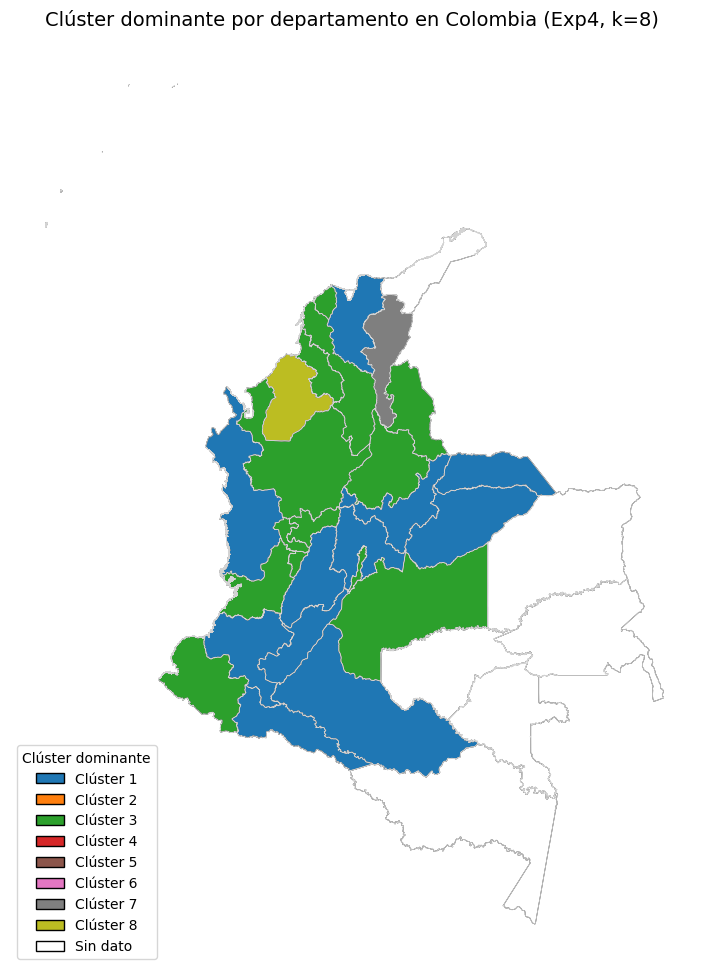

In [368]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Definir colores por clúster
clusters_sorted = sorted(df_lab["Cluster"].unique())
cmap = plt.get_cmap("tab10")  # paleta de colores
color_map = {c: cmap(i/len(clusters_sorted)) for i, c in enumerate(clusters_sorted)}

gdf_join["color"] = gdf_join["cluster_dom"].map(color_map).fillna("#FFFFFF")

# Graficar
fig, ax = plt.subplots(figsize=(12,12))
gdf_dpto.boundary.plot(ax=ax, color="lightgrey", linewidth=0.6)  # contorno
gdf_join.plot(ax=ax, color=gdf_join["color"], edgecolor="black", linewidth=0.5)

# Leyenda personalizada
legend_patches = [Patch(facecolor=color_map[c], edgecolor="black", label=f"Clúster {c}")
                  for c in clusters_sorted]
legend_patches.append(Patch(facecolor="#FFFFFF", edgecolor="black", label="Sin dato"))
ax.legend(handles=legend_patches, title="Clúster dominante", loc="lower left", frameon=True)

ax.set_title("Clúster dominante por departamento en Colombia (Exp4, k=8)", fontsize=14, pad=12)
ax.set_axis_off()
plt.show()


In [370]:
df_lab["dep_norm"] = norm(df_lab["Nombre Departamento"])

# Calcular cluster dominante por Departamento y AREA
dom_area = (
    df_lab.groupby(["dep_norm", "AREA"])["Cluster"]
          .agg(lambda s: s.value_counts().idxmax())
          .reset_index()
          .rename(columns={"Cluster": "cluster_dom"})
)

In [372]:
# Cargar shapefile de Colombia
SHAPE_DPTOS = "Geografia Colombia/gadm41_COL_shp/gadm41_COL_1.shp"
gdf_dpto = gpd.read_file(SHAPE_DPTOS)

# Normalizar nombres
gdf_dpto["dep_norm"] = norm(gdf_dpto["NAME_1"])

# Merge shapefile con resultados de clusters (duplicado por Rural/Urbano)
gdf_area = gdf_dpto.merge(dom_area, on="dep_norm", how="left")


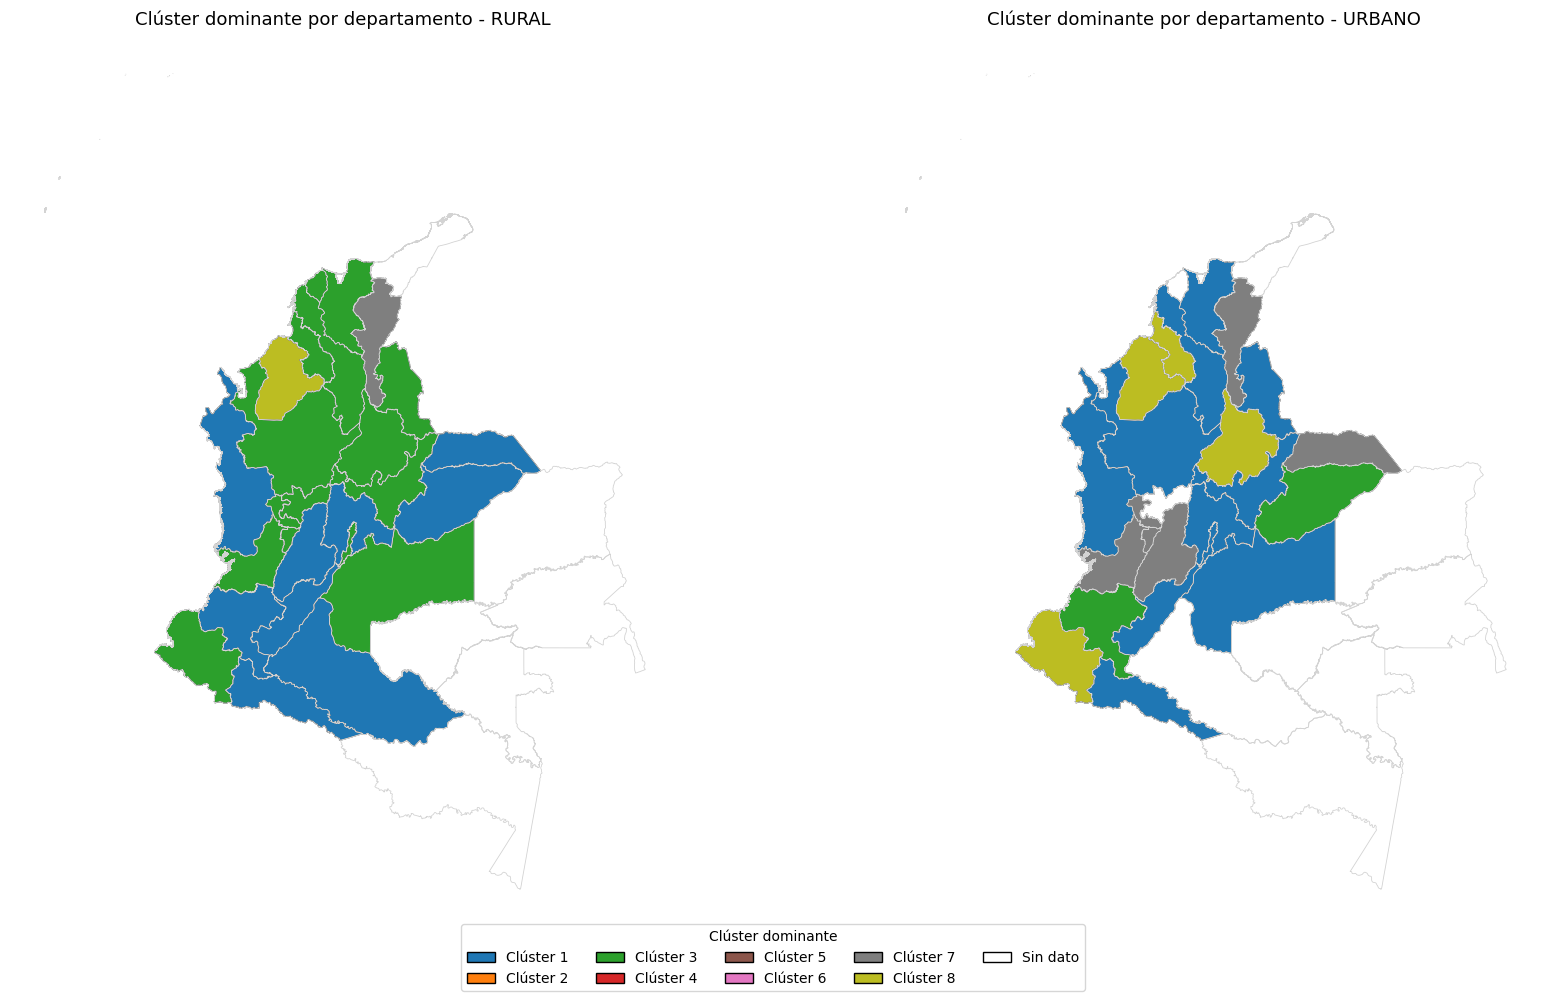

In [374]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Colores por clúster
clusters_sorted = sorted(df_lab["Cluster"].unique())
cmap = plt.get_cmap("tab10")
color_map = {c: cmap(i/len(clusters_sorted)) for i, c in enumerate(clusters_sorted)}
gdf_area["color"] = gdf_area["cluster_dom"].map(color_map).fillna("#FFFFFF")

# Crear figura con dos mapas
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Rural (AREA=1)
gdf_dpto.boundary.plot(ax=axes[0], color="lightgrey", linewidth=0.6)
gdf_area[gdf_area["AREA"]==1].plot(ax=axes[0], color=gdf_area[gdf_area["AREA"]==1]["color"],
                                   edgecolor="black", linewidth=0.5)
axes[0].set_title("Clúster dominante por departamento - RURAL", fontsize=13)
axes[0].axis("off")

# Urbano (AREA=2)
gdf_dpto.boundary.plot(ax=axes[1], color="lightgrey", linewidth=0.6)
gdf_area[gdf_area["AREA"]==2].plot(ax=axes[1], color=gdf_area[gdf_area["AREA"]==2]["color"],
                                   edgecolor="black", linewidth=0.5)
axes[1].set_title("Clúster dominante por departamento - URBANO", fontsize=13)
axes[1].axis("off")

# Leyenda común
legend_patches = [Patch(facecolor=color_map[c], edgecolor="black", label=f"Clúster {c}") 
                  for c in clusters_sorted]
legend_patches.append(Patch(facecolor="#FFFFFF", edgecolor="black", label="Sin dato"))
fig.legend(handles=legend_patches, title="Clúster dominante", loc="lower center", ncol=5, frameon=True)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()